In [46]:
#!pip install nbconvert[webpdf]

SyntaxError: invalid syntax (<ipython-input-47-1be2664eae28>, line 1)

In [1]:
# importing the libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

In [2]:
# loading the dataset
dataset = np.load('C:\\Users\\karm_ch\\Documents\\autocoast\\data\\Sentinel-2\\dwdata900\\s2raw\\data_2\\all_numpy_stacked.npy')
 
# printing first five rows of the dataset
#print(dataset.head(5))
dataset=dataset[0:300]
# printing the shape of dataset
print(dataset.shape)


(300, 4)


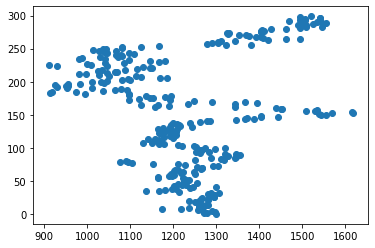

In [4]:
import matplotlib.pyplot as plt
plt.scatter(dataset[:, 0], np.arange(dataset.shape[0]))

plt.show()

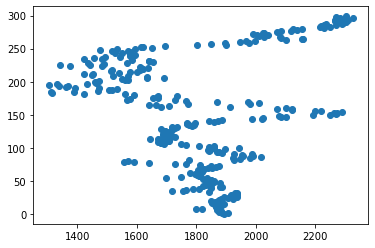

In [5]:
plt.scatter(dataset[:, 1], np.arange(dataset.shape[0]))

plt.show()

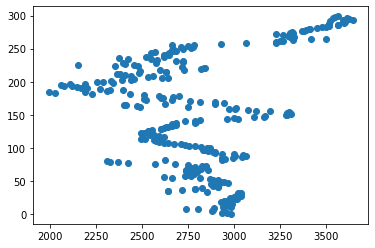

In [5]:
plt.scatter(dataset[:, 2], np.arange(dataset.shape[0]))

plt.show()

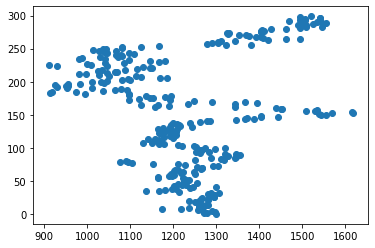

In [6]:
plt.scatter(dataset[:, 0], np.arange(dataset.shape[0]))

plt.show()

We see around 10 clusters, let's assume we have miminum 2 clusters (not round of course) , still try k -means 

# ELBOW visualizer

12


C:\Users\karm_ch\AppData\Local\Continuum\anaconda3\envs\gdal_env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\karm_ch\AppData\Local\Continuum\anaconda3\envs\gdal_env\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\karm_ch\AppData\Local\Continuum\anaconda3\envs\gdal_env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\karm_ch\AppData\Local\Continuum\anaconda3\envs\gdal_env\lib\site-packages\sklearn\cluster\_kmeans.py:1382: User

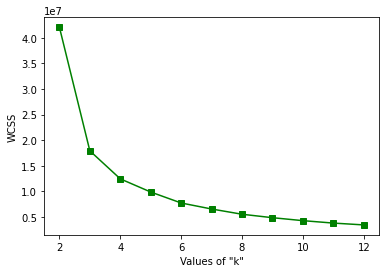

In [6]:
# determining the maximum number of clusters
# using the simple method
limit = int((dataset.shape[0]//2)**0.5)
print(limit)

# selecting optimal value of 'k'
# using elbow method

# wcss - within cluster sum of
# squared distances
wcss = {}

for k in range(2,limit+1):
    model = KMeans(n_clusters=k)
    model.fit(dataset)
    wcss[k] = model.inertia_

# plotting the wcss values
# to find out the elbow value
plt.plot(wcss.keys(), wcss.values(), 'gs-')
plt.xlabel('Values of "k"')
plt.ylabel('WCSS')
plt.show()


# Silhouette score

In [10]:
# importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


Silhouette Score = (b-a)/max(a,b)

where

a= average intra-cluster distance i.e the average distance between each point within a cluster.

b= average inter-cluster distance i.e the average distance between all clusters.

In [13]:
# determining the maximum number of clusters
# using the simple method
imit = 20 # int((dataset.shape[0]//2)**0.5)

obs= np.zeros((limit+2))

# determining number of clusters
# using silhouette score method
for k in range(2, limit+1):
    model = KMeans(n_clusters=k)
    model.fit(dataset)
    pred = model.predict(dataset)
    score = silhouette_score(dataset, pred)
    obs[k]=score 
    
    print('Silhouette Score for k = {}: {:<.3f}'.format(k, score))


C:\Users\karm_ch\AppData\Local\Continuum\anaconda3\envs\gdal_env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\karm_ch\AppData\Local\Continuum\anaconda3\envs\gdal_env\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\karm_ch\AppData\Local\Continuum\anaconda3\envs\gdal_env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\karm_ch\AppData\Local\Continuum\anaconda3\envs\gdal_env\lib\site-packages\sklearn\cluster\_kmeans.py:1382: User

Silhouette Score for k = 2: 0.482
Silhouette Score for k = 3: 0.536
Silhouette Score for k = 4: 0.490
Silhouette Score for k = 5: 0.422


C:\Users\karm_ch\AppData\Local\Continuum\anaconda3\envs\gdal_env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\karm_ch\AppData\Local\Continuum\anaconda3\envs\gdal_env\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\karm_ch\AppData\Local\Continuum\anaconda3\envs\gdal_env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\karm_ch\AppData\Local\Continuum\anaconda3\envs\gdal_env\lib\site-packages\sklearn\cluster\_kmeans.py:1382: User

Silhouette Score for k = 6: 0.420
Silhouette Score for k = 7: 0.425
Silhouette Score for k = 8: 0.420
Silhouette Score for k = 9: 0.439


C:\Users\karm_ch\AppData\Local\Continuum\anaconda3\envs\gdal_env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\karm_ch\AppData\Local\Continuum\anaconda3\envs\gdal_env\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\karm_ch\AppData\Local\Continuum\anaconda3\envs\gdal_env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\karm_ch\AppData\Local\Continuum\anaconda3\envs\gdal_env\lib\site-packages\sklearn\cluster\_kmeans.py:1382: User

Silhouette Score for k = 10: 0.439
Silhouette Score for k = 11: 0.396
Silhouette Score for k = 12: 0.416


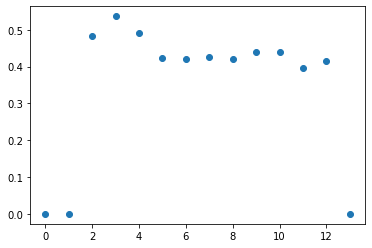

In [20]:
obs

plt.scatter(np.arange(obs.shape[0]), obs)

# Gaussian mixture model 

A Gaussian mixture model is a probabilistic model that assumes all the data points are generated from a mixture of a finite number of Gaussian distributions with unknown parameters. One can think of mixture models as generalizing k-means clustering to incorporate information about the covariance structure of the data as well as the centers of the latent Gaussians.

In [24]:
dataset.shape

(300, 4)

In [34]:
import numpy as np
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=10, random_state=0).fit(dataset)
gm.means_
gm.predict([dataset[89]])


C:\Users\karm_ch\AppData\Local\Continuum\anaconda3\envs\gdal_env\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


array([7], dtype=int64)

In [35]:
gm.predict_proba([dataset[89]])

array([[6.28899753e-40, 1.18064322e-17, 3.00624925e-15, 1.97783617e-03,
        3.26551699e-19, 1.76335231e-19, 2.44336799e-47, 6.35487921e-01,
        3.62534243e-01, 9.79031334e-15]])

In [ ]:
#https://scikit-learn.org/stable/auto_examples/mixture/plot_gmm_selection.html#sphx-glr-auto-examples-mixture-plot-gmm-selection-py

# choice 1 : Using Bayesian Information Criteria to select the number of clusters (GM Model selection)

In [42]:
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import GridSearchCV
X=dataset

def gmm_bic_score(estimator, X):
    """Callable to pass to GridSearchCV that will use the BIC score."""
    # Make it negative since GridSearchCV expects a score to maximize
    return -estimator.bic(X)


param_grid = {
    "n_components": range(1, 20),
    "covariance_type": ["spherical", "tied", "diag", "full"],
}
grid_search = GridSearchCV(
    GaussianMixture(), param_grid=param_grid, scoring=gmm_bic_score
)
grid_search.fit(dataset)

C:\Users\karm_ch\AppData\Local\Continuum\anaconda3\envs\gdal_env\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\karm_ch\AppData\Local\Continuum\anaconda3\envs\gdal_env\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\karm_ch\AppData\Local\Continuum\anaconda3\envs\gdal_env\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\karm_ch

C:\Users\karm_ch\AppData\Local\Continuum\anaconda3\envs\gdal_env\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\karm_ch\AppData\Local\Continuum\anaconda3\envs\gdal_env\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\karm_ch\AppData\Local\Continuum\anaconda3\envs\gdal_env\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\karm_ch

C:\Users\karm_ch\AppData\Local\Continuum\anaconda3\envs\gdal_env\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\karm_ch\AppData\Local\Continuum\anaconda3\envs\gdal_env\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\karm_ch\AppData\Local\Continuum\anaconda3\envs\gdal_env\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\karm_ch

C:\Users\karm_ch\AppData\Local\Continuum\anaconda3\envs\gdal_env\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\karm_ch\AppData\Local\Continuum\anaconda3\envs\gdal_env\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\karm_ch\AppData\Local\Continuum\anaconda3\envs\gdal_env\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\karm_ch

C:\Users\karm_ch\AppData\Local\Continuum\anaconda3\envs\gdal_env\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\karm_ch\AppData\Local\Continuum\anaconda3\envs\gdal_env\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\karm_ch\AppData\Local\Continuum\anaconda3\envs\gdal_env\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\karm_ch

C:\Users\karm_ch\AppData\Local\Continuum\anaconda3\envs\gdal_env\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\karm_ch\AppData\Local\Continuum\anaconda3\envs\gdal_env\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\karm_ch\AppData\Local\Continuum\anaconda3\envs\gdal_env\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\karm_ch

C:\Users\karm_ch\AppData\Local\Continuum\anaconda3\envs\gdal_env\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\karm_ch\AppData\Local\Continuum\anaconda3\envs\gdal_env\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\karm_ch\AppData\Local\Continuum\anaconda3\envs\gdal_env\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\karm_ch

C:\Users\karm_ch\AppData\Local\Continuum\anaconda3\envs\gdal_env\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\karm_ch\AppData\Local\Continuum\anaconda3\envs\gdal_env\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\karm_ch\AppData\Local\Continuum\anaconda3\envs\gdal_env\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\karm_ch

C:\Users\karm_ch\AppData\Local\Continuum\anaconda3\envs\gdal_env\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\karm_ch\AppData\Local\Continuum\anaconda3\envs\gdal_env\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\karm_ch\AppData\Local\Continuum\anaconda3\envs\gdal_env\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\karm_ch

C:\Users\karm_ch\AppData\Local\Continuum\anaconda3\envs\gdal_env\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\karm_ch\AppData\Local\Continuum\anaconda3\envs\gdal_env\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\karm_ch\AppData\Local\Continuum\anaconda3\envs\gdal_env\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\karm_ch

C:\Users\karm_ch\AppData\Local\Continuum\anaconda3\envs\gdal_env\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\karm_ch\AppData\Local\Continuum\anaconda3\envs\gdal_env\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\karm_ch\AppData\Local\Continuum\anaconda3\envs\gdal_env\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\karm_ch

C:\Users\karm_ch\AppData\Local\Continuum\anaconda3\envs\gdal_env\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\karm_ch\AppData\Local\Continuum\anaconda3\envs\gdal_env\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\karm_ch\AppData\Local\Continuum\anaconda3\envs\gdal_env\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\karm_ch

C:\Users\karm_ch\AppData\Local\Continuum\anaconda3\envs\gdal_env\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\karm_ch\AppData\Local\Continuum\anaconda3\envs\gdal_env\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\karm_ch\AppData\Local\Continuum\anaconda3\envs\gdal_env\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\karm_ch

C:\Users\karm_ch\AppData\Local\Continuum\anaconda3\envs\gdal_env\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\karm_ch\AppData\Local\Continuum\anaconda3\envs\gdal_env\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\karm_ch\AppData\Local\Continuum\anaconda3\envs\gdal_env\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\karm_ch

GridSearchCV(estimator=GaussianMixture(),
             param_grid={'covariance_type': ['spherical', 'tied', 'diag',
                                             'full'],
                         'n_components': range(1, 20)},
             scoring=<function gmm_bic_score at 0x000001AB6CDE0700>)

In [43]:
import pandas as pd

df = pd.DataFrame(grid_search.cv_results_)[
    ["param_n_components", "param_covariance_type", "mean_test_score"]
]
df["mean_test_score"] = -df["mean_test_score"]
df = df.rename(
    columns={
        "param_n_components": "Number of components",
        "param_covariance_type": "Type of covariance",
        "mean_test_score": "BIC score",
    }
)
df.sort_values(by="BIC score").head(20)

,Number of components,Type of covariance,BIC score
19,1,tied,3039.428746
57,1,full,3039.428746
20,2,tied,3161.941466
22,4,tied,3250.318692
58,2,full,3268.477748
21,3,tied,3311.976343
24,6,tied,3393.872797
23,5,tied,3399.357662
25,7,tied,3442.430696
59,3,full,3484.517098


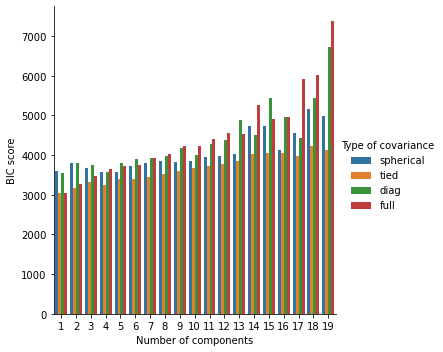

In [44]:
import seaborn as sns

sns.catplot(
    data=df,
    kind="bar",
    x="Number of components",
    y="BIC score",
    hue="Type of covariance",
)
plt.show()


# plot the clusters

In [4]:
from sklearn.cluster import KMeans
 
#Initialize the class object
kmeans = KMeans(n_clusters= 4)
 
#predict the labels of clusters.
label = kmeans.fit_predict(dataset)
 
print(label)

C:\Users\karm_ch\AppData\Local\Continuum\anaconda3\envs\gdal_env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 0 0 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 0 0 2 2 2 2 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 3 3 0 3 3 3 3 3 1
 1 1 1 1 1 1 1 1 1 3 3 3 3 3 0 0 2 2 0 3 3 3 3 3 0 0 0 0 0 0 0 0 0 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 2 2 2 2 0 0 0 0 0 0 3 3 3
 0 0 2 2 2 2 2 0 0 0 0 0 0 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 3 3 3 3
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1]


C:\Users\karm_ch\AppData\Local\Continuum\anaconda3\envs\gdal_env\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [7]:
import matplotlib.pyplot as plt

 
#filter rows of original data
filtered_label0 = dataset[label == 0]
 
#plotting the results
plt.scatter(filtered_label0[:,0] , filtered_label0[:,1])
plt.show()

NameError: name 'label' is not defined

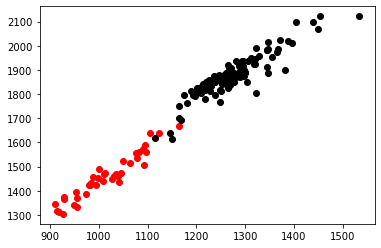

In [11]:
#filter rows of original data
filtered_label2 = dataset[label == 2]
 
filtered_label8 = dataset[label == 3]
 
#Plotting the results
plt.scatter(filtered_label2[:,0] , filtered_label2[:,1] , color = 'red')
plt.scatter(filtered_label8[:,0] , filtered_label8[:,1] , color = 'black')
plt.show()

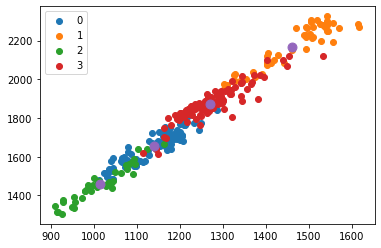

In [14]:
#Getting the Centroids
centroids = kmeans.cluster_centers_
u_labels = np.unique(label)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(dataset[label == i , 0] , dataset[label == i , 1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80)
plt.legend()
plt.show()

['r' 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'g' 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'b'
 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'r' 'b' 'g' 'g'
 'g' 'g' 'b' 'b' 'r' 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'b'
 'b' 'g' 'g' 'g' 'g' 'b' 'b' 'g' 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'b'
 'b' 'r' 'b' 'b' 'g' 'g' 'g' 'g' 'g' 'b' 'r' 'r' 'b' 'r' 'r' 'r' 'r' 'r'
 'r' 'r' 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'r' 'b' 'b' 'b' 'b' 'b' 'g' 'g' 'g'
 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'b' 'b' 'g' 'g' 'b' 'g' 'g' 'g' 'g' 'b' 'g'
 'g' 'g' 'b' 'g' 'g' 'g' 'b' 'b' 'g' 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'r' 'r'
 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r'
 'g' 'g' 'g' 'g' 'b' 'r' 'r' 'r' 'b' 'b' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g'
 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g'
 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g'
 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g'
 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g

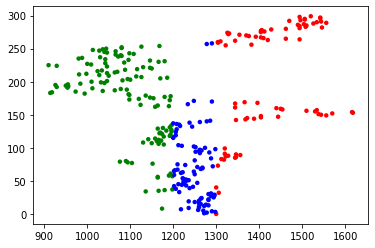

In [8]:
#dataset=dataset[0:300]
#colors=['red', 'blue', 'green', 'purple']

x=dataset[:, 0]
y=np.arange(dataset.shape[0])

col = np.where(x<1200,'g',np.where(x<1300,'b','r'))
print(col)
plt.scatter(x, y, c=col, s=20, linewidth=0)

#plt.scatter(x, y, color="red")


# Choice 2:  Variational Bayesian Gaussian Mixture - no need to specify the number of cluster in the beginning - known to be slightly biased - uses dirichlet prior